# Bibliotecas

In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Importando os dados para o pandas

In [54]:
base_credit = pd.read_csv('/Users/raulcorrea/Documents/Estudos/MLeDS_AZ/Bases de dados/credit_data.csv')

In [55]:
base_credit 

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [56]:
base_credit.head() #top10
base_credit.tail() #last5
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [57]:
base_credit[base_credit['income'] >= 69995.685578] #maior rendimento

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


# Analisando e visualizando os dados

In [58]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

*alguns graficos*

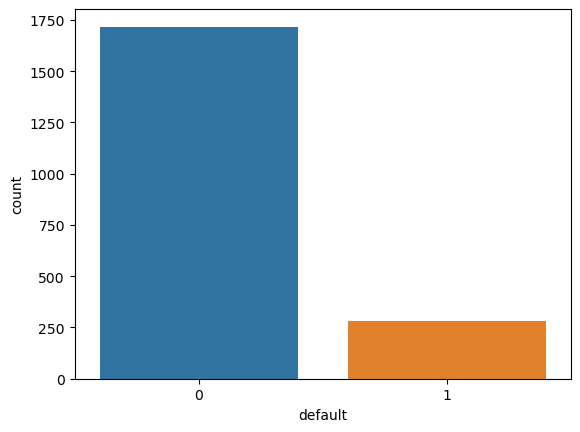

In [59]:
sns.countplot(x = base_credit['default']);

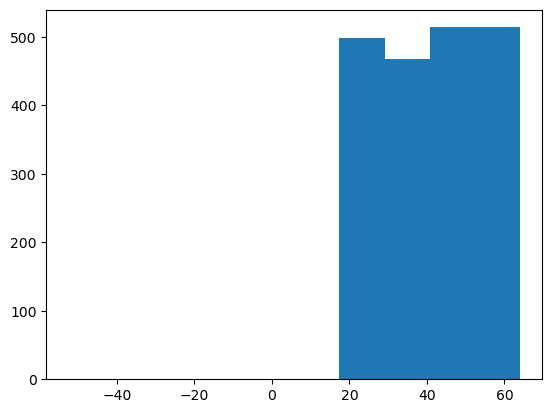

In [60]:
plt.hist(x = base_credit['age']);

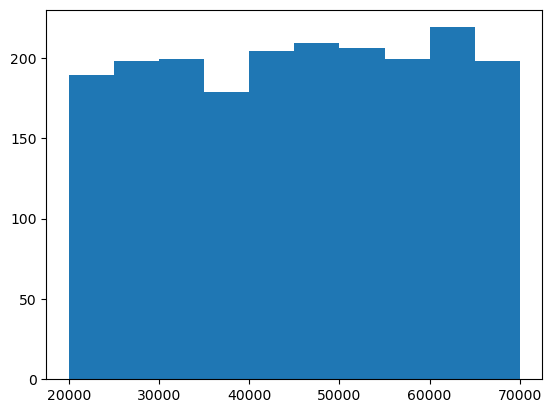

In [61]:
plt.hist(x = base_credit['income']);

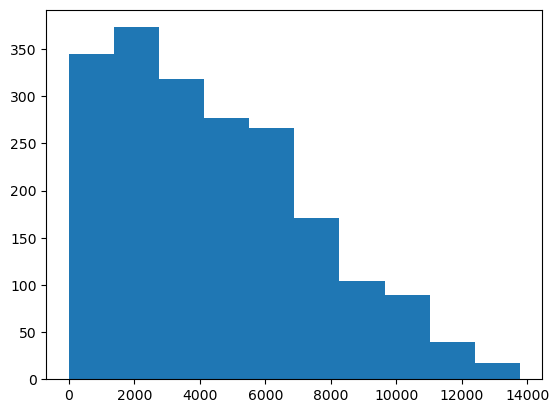

In [62]:
plt.hist(x = base_credit['loan']);

In [63]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()

# Tratando valores negativos

In [64]:
base_credit[base_credit['age'] < 0];
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [65]:
#apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [66]:
#Preencher os valores manualmente - melhor maneira de tratar colunas vazias
#preenchendo com a media
base_credit['age'][base_credit['age']>0].mean(); #calculando a media
base_credit.loc[base_credit['age']<0] = base_credit['age'][base_credit['age']>0].mean() ; #substituindo os valores negativos pelos valores medios

# Tratando valores nulos

In [67]:
base_credit.isnull().sum(); #somatorio dos nulos para todos os campos
base_credit.loc[pd.isnull(base_credit['age'])] ##localizando os registros nulos

,clientid,income,age,loan,default
28,29.0,59417.805406,NaN,2082.625938,0.0
30,31.0,48528.852796,NaN,6155.784670,0.0
31,32.0,23526.302555,NaN,2862.010139,0.0


In [68]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True); ##alterando direto na memoria com fill (removendo nulos) + inplace (salvando na raiz)
base_credit.loc[pd.isnull(base_credit['age'])] 

,clientid,income,age,loan,default


*divisao base de dados entre previsores e classes*

In [69]:
x_credit = base_credit.iloc[:, 1:4].values 
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [70]:
type(x_credit)

numpy.ndarray

In [71]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0., 0., 0., ..., 1., 0., 0.])

In [72]:
type(y_credit)

numpy.ndarray

# Escalonamento dos valores

In [73]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [74]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max(),  #olhando os atributos

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [75]:
x_credit[:,0].mean(), x_credit[:,1].mean(), x_credit[:,2].mean(),  #olhando os atributos

(45258.668216195045, 40.92770044906149, 4435.522770810168)

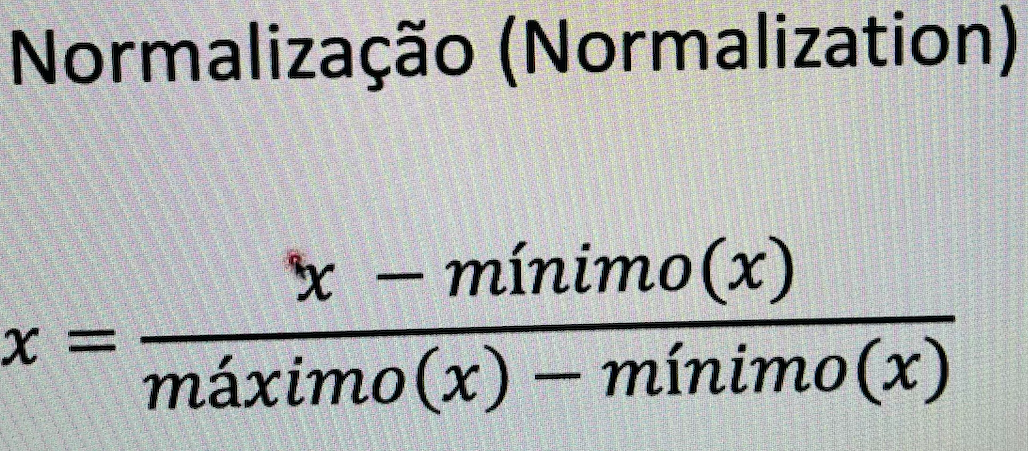

In [76]:
from IPython import display
display.Image("/Users/raulcorrea/Documents/Estudos/MLeDS_AZ/Imagens/normalization.png")

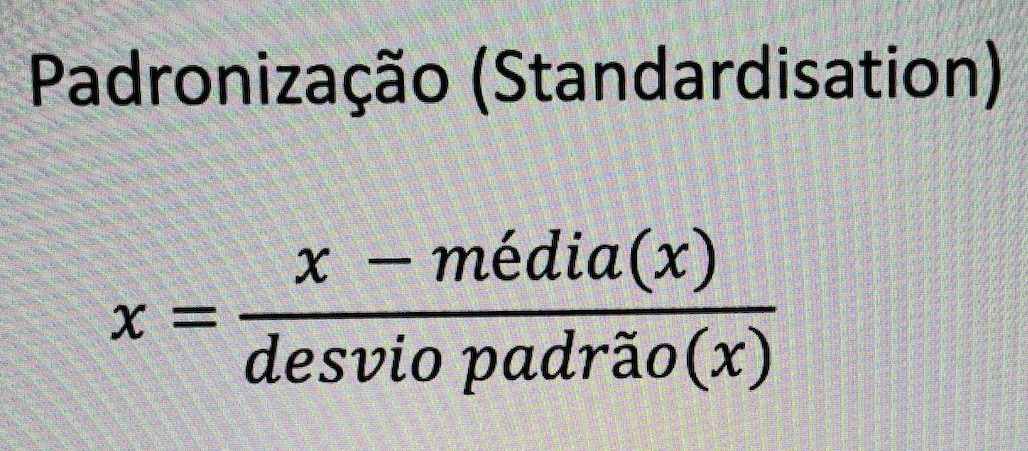

In [77]:
from IPython import display
display.Image("/Users/raulcorrea/Documents/Estudos/MLeDS_AZ/Imagens/standardisation.png")

In [78]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min(),  #olhando os atributos

(40.92770044906149, 18.055188510566897, 1.37762959325451)

In [79]:
#padronizacao com sklearn
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [80]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min(),  #olhando os atributos

(-3.135649823166977, -1.7264154144794286, -1.4551485371807487)

In [81]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max(),  #olhando os atributos

(1.7154024777117534, 1.739366520151568, 3.0619892718191832)

In [82]:
x_credit

array([[ 1.44913211,  1.36538005,  1.20471111],
       [-0.75194964,  0.54265932,  0.69874452],
       [ 0.83620364,  1.67417101,  1.17662679],
       ...,
       [-0.06568543, -0.97448606,  0.35680621],
       [-0.10419945,  1.73936652, -0.92307354],
       [ 1.67663095,  1.14917551,  0.96590308]])

# Divisão das bases em treinamento e teste

In [83]:
from sklearn.model_selection import train_test_split

*Credit Data*

In [84]:
x_credit

array([[ 1.44913211,  1.36538005,  1.20471111],
       [-0.75194964,  0.54265932,  0.69874452],
       [ 0.83620364,  1.67417101,  1.17662679],
       ...,
       [-0.06568543, -0.97448606,  0.35680621],
       [-0.10419945,  1.73936652, -0.92307354],
       [ 1.67663095,  1.14917551,  0.96590308]])

In [85]:
y_credit

array([0., 0., 0., ..., 1., 0., 0.])

In [86]:
#Criando as tabelas
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

In [87]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

# Salvando as bases

In [88]:
import pickle

In [89]:
with open('/Users/raulcorrea/Documents/Estudos/MLeDS_AZ/Bases de dados/credit.pkl', mode ='wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste],f)